In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dataset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from matplotlib import pyplot as plt
# gpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print("device: gpu") if torch.cuda.is_available() else print("device: cpu")
# # print("device: gpu") if torch.cuda.is_

In [15]:
# hypter parameter setting
learning_rate = 1e-1 # 0.1
epochs = 50
batch_size = 60000 # gradient descent
display_step = 10

100.1%

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


113.5%

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


100.4%

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


180.4%/tmp/pip-req-build-w9kte7xz/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!
len(train_data):  60000
len(test_data):  10000
data shape:  torch.Size([1, 28, 28])
label:  5


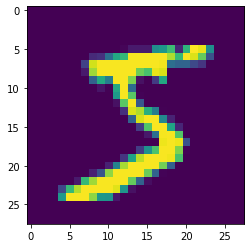

In [8]:
# load data
train_data = dataset.MNIST("./", train = True, transform = transforms.ToTensor(), target_transform = None, download = True)
test_data = dataset.MNIST("./", train = False, transform = transforms.ToTensor(), target_transform = None, download = True)

# check the data
print('len(train_data): ', len(train_data))
print('len(test_data): ', len(test_data))

x_train, y_train = train_data[0]
print('data shape: ', x_train.shape)
print('label: ', y_train)

plt.figure()
plt.imshow(x_train[0])
plt.show()

data shape: torch.Size([60000, 1, 28, 28])
label: tensor([1, 4, 1,  ..., 5, 2, 2])


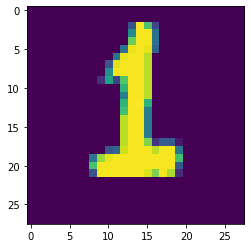

In [9]:
# Pre-process (batch, shuffle)
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True, num_workers = 1, drop_last = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = 10000, shuffle = True, num_workers = 1, drop_last = True)

# check the data 
examples = enumerate(train_loader)
batch_idx, (example_data, example_target) = next(examples)

print('data shape:', example_data.shape)
print('label:', example_target)

plt.figure()
plt.imshow(example_data[0][0])
plt.show()

In [17]:
# model
model = nn.Linear(28*28, 10) # label의 갯수는 10
model = model.to(device)
model.train()

# loss and optimizer 
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

loss_array = []

# train the model
for epoch in range(epochs):
    for iteration, [data, label] in enumerate(train_loader): # batch 별로 데이터를 불러와서 weight경신 시키기 위한 for 문
        optimizer.zero_grad()
        
        x = data.to(device)
        x = x.view(batch_size, -1)  #앞에는 사이즈에 맞게 그대로 나두고 뒤에는 쭉 풀어줘
        y = label.to(device) # 데이터를 지피유상에 다올림.
        
        output = model(x)

        loss = loss_function(output, y)
        loss.backward()
        optimizer.step()
            
        loss_array.append(loss.cpu().detach().numpy())
    
    if epoch % 10 == 0:
        print("Epoch:", epoch + 1, "\Loss:", loss)

Epoch: 1 \Loss: tensor(2.3406, grad_fn=<NllLossBackward>)
Epoch: 11 \Loss: tensor(1.5690, grad_fn=<NllLossBackward>)
Epoch: 21 \Loss: tensor(1.2006, grad_fn=<NllLossBackward>)
Epoch: 31 \Loss: tensor(1.0030, grad_fn=<NllLossBackward>)
Epoch: 41 \Loss: tensor(0.8823, grad_fn=<NllLossBackward>)


In [ ]:
plt.figure()
plt.plot(loss_array)
plt.show()

In [ ]:
# test
model.eval()
test_loader = torch.utils.data.DataLoader(test_data, batch_size = 10000, shuffle = True, num_workers = 1, drop_last = True)
correct = 0
total = 0

prediction_list = [요 # 밑에 confusion maxtrix를 그리기위한 리스트
label_list = []

with torch.no_grad(): # test데이터는 학습하면 안되기 때문에 no_grad를 무조건해줘야함 매우중요
    for data, label in test_loader:
        x = data.to(device)
        x = x.view(-1, 784)
        y = label.to(device)
        
        prediction = model(x)
        _, prediction_index = torch.max(prediction, 1) # 가장 1등만 뽑아줘.
                
        prediction_list.append(prediction_index)
        label_list.append(y)
        
        total += y.size(0)
        correct += (prediction_index == y).sum().float()
        
print('total', total)
print('correct', correct)
print('accuracy', correct/total)